In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
from sklearn.model_selection import train_test_split

In [2]:
%load_ext autoreload
%autoreload 2
import CCPA_lib as cp


In [3]:
sns.set_context('poster')
sns.set_style('white')

In [4]:
ppallete = 'RdYlGn'#'YlGn_d' #"BuGn_d"
porder = ['MED4',  'MIT9312','MIT0604', 'Natl2A', 'MIT9313']
ppallete = [ '#62A586', '#face6e','#f79934', '#7A9BC8', '#F47681', ]
# #ffd7a1
    
pedge = 'green'
apallete = "spring"
aorder = ['DE', 'DE1', '1A3', 'ATCC', 'BS11']
amarkers = ['X', 'P', 's', 'D', 'o']
aedge='orange'
epallete = ['#6cf0ba', '#d13f75', '#eeb7cb', '#b9d2d8', '#407f90']
#sns.diverging_palette(355, 217, s=74, l=50, n=4) #'Paired' # 'BrBG'# "coolwarm"
eorder = ['e1','e3', 'e4', 'e5', 'e6']
#aedge='orange'

espallete = ['#6cf0ba', '#D55282', '#538B9B']
#  604 #FCC479
#     #ffd7a1
#     #fcb14c
#     MED4 = #62A586
#     9313 #F47681
#     natl #7A9BC8

In [5]:
df = pd.read_pickle('CCPA.pkl.gz')
df.loc[df.PRO == 'C9B', 'PRO'] = 'MIT0604'

In [25]:
dfw = df.loc[(df.experiment.isin(['e1', 'e3', 'e4','e5', 'e6']))]
dfw = dfw.loc[(dfw.experiment.isin(['e5', 'e6']) & (dfw.day >=80)) |
              (~dfw.experiment.isin(['e5', 'e6']) & (dfw.day >=100))
             ]

In [26]:
dfw.groupby('experiment_sample').agg({'experiment': 'first', 'day': 'max'}).groupby('experiment')['day'].max()

experiment
e1    140.708333
e3    140.930000
e4    140.900000
e5    120.900000
e6    122.760000
Name: day, dtype: float64

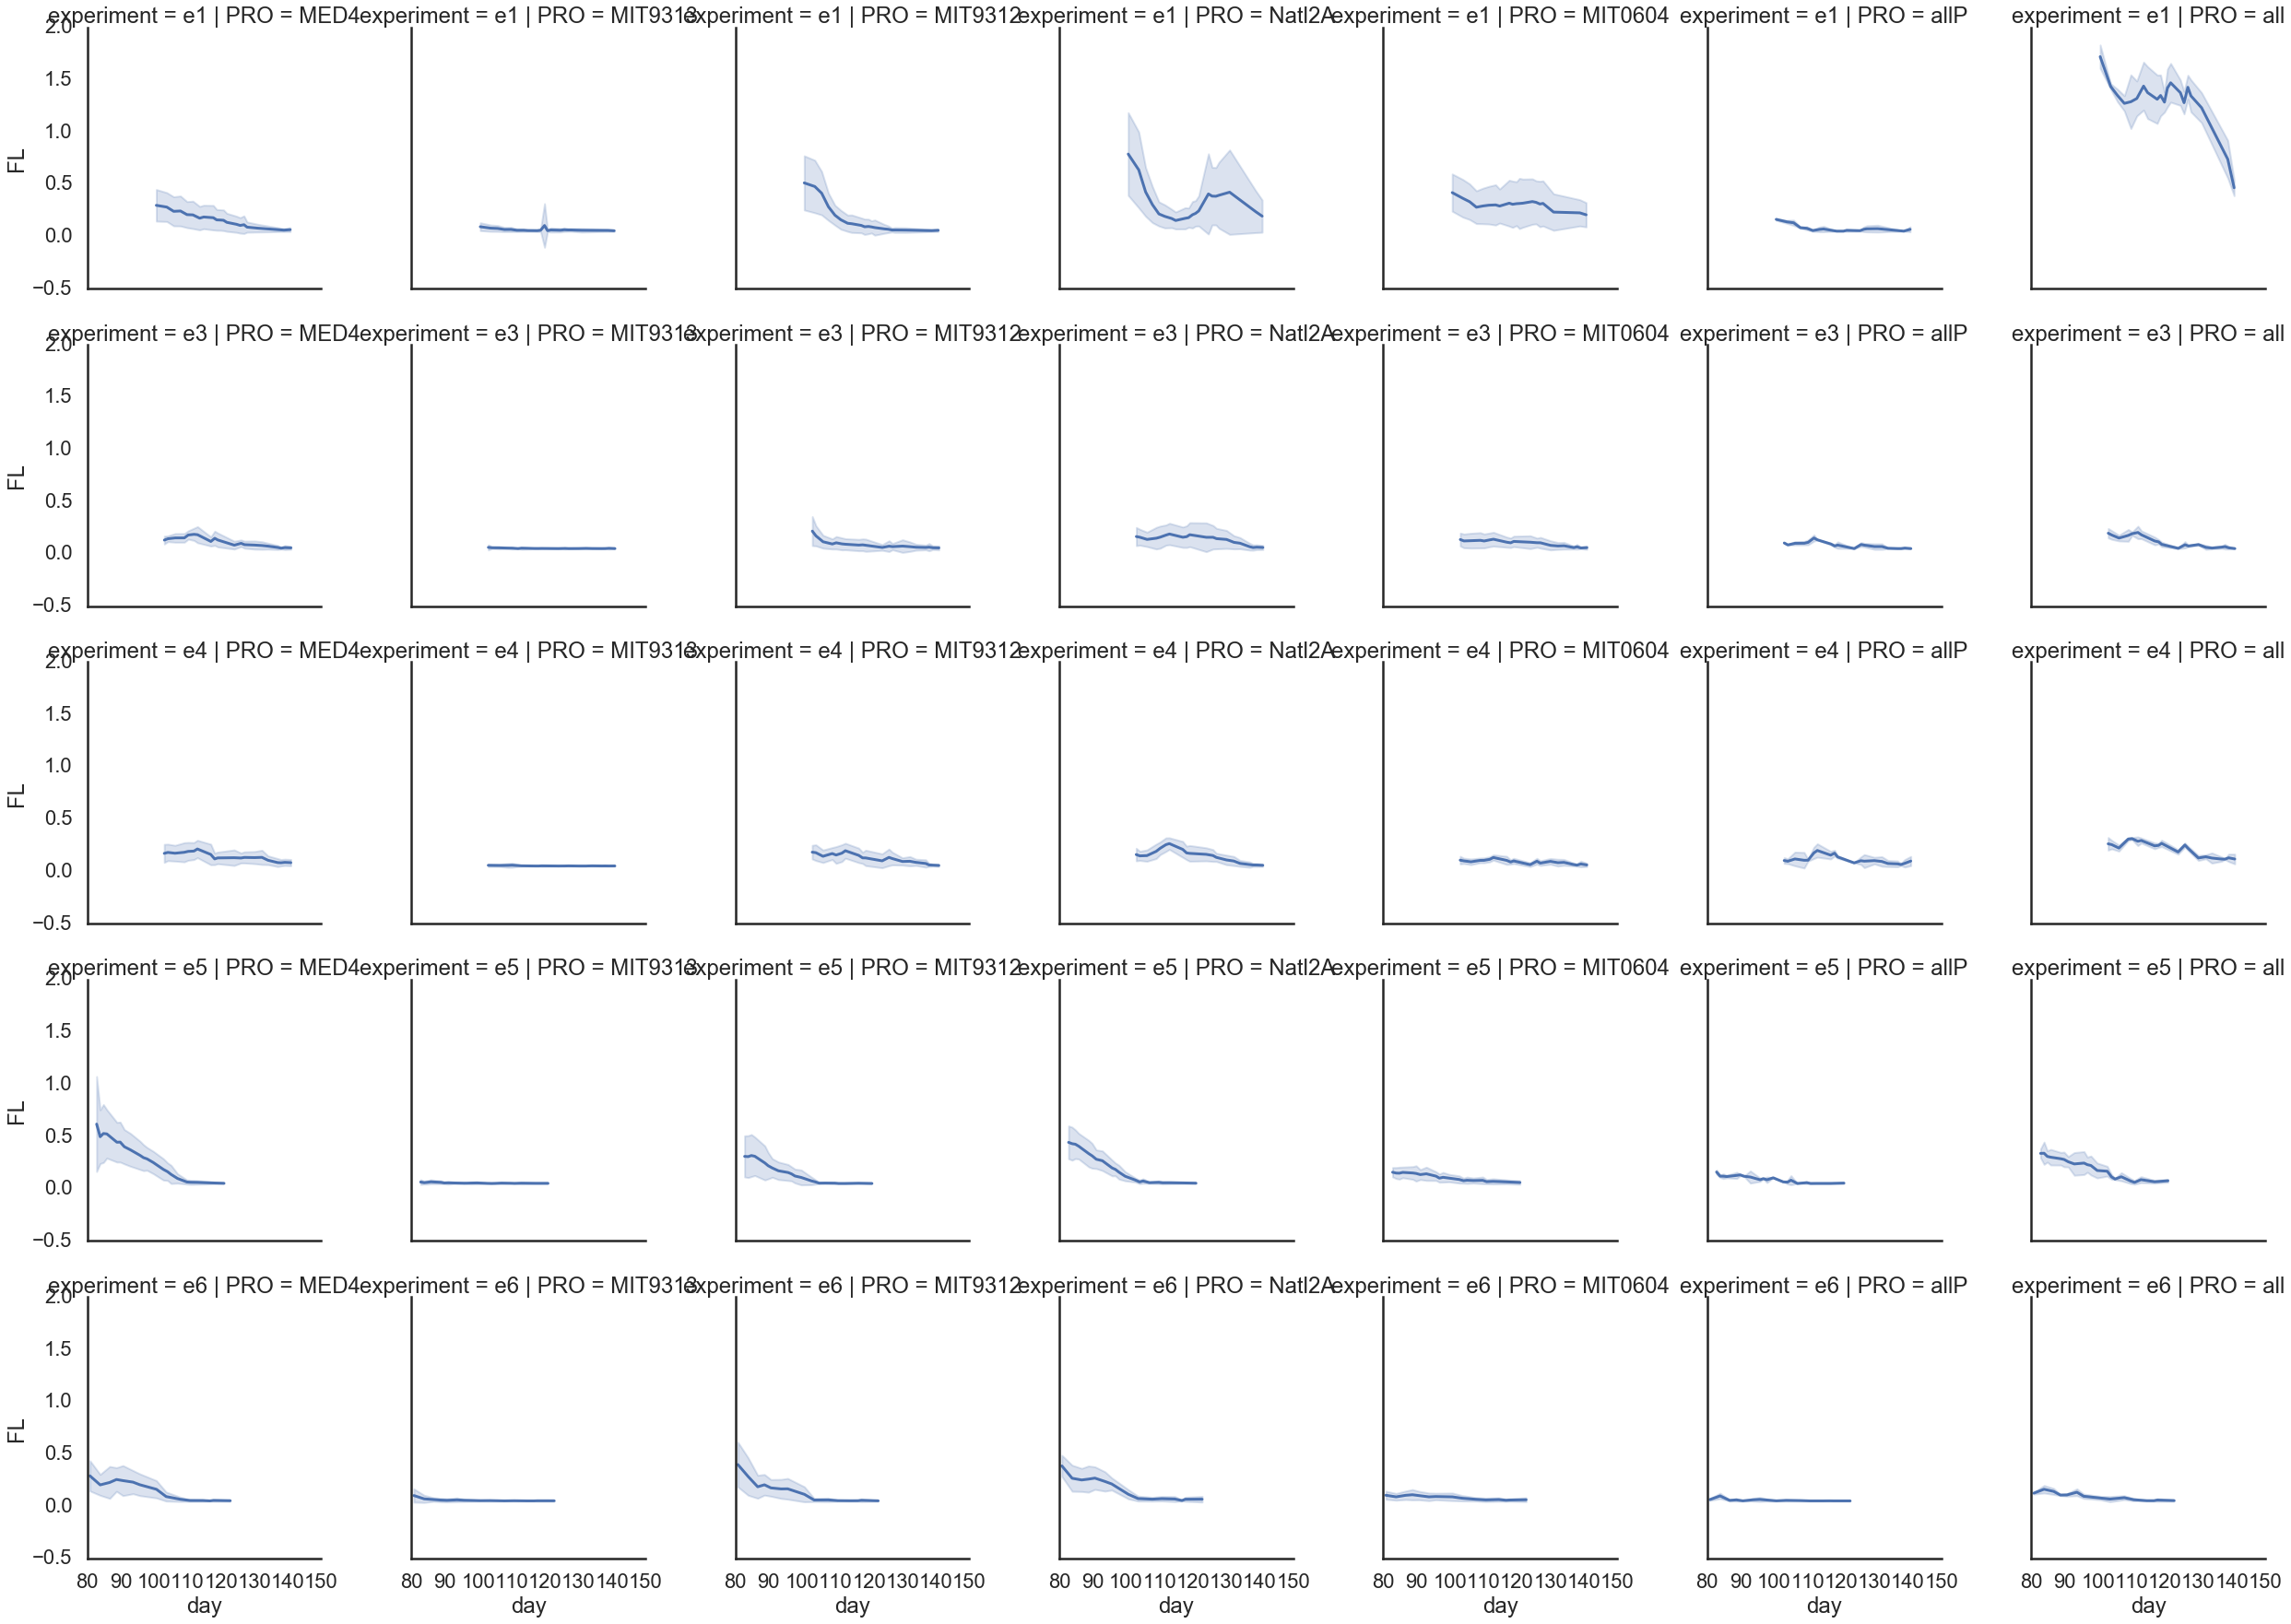

In [27]:
sns.relplot(data=dfw, 
            x='day', y='FL', 
            kind='line', ci='sd', col='PRO', row='experiment'
           )

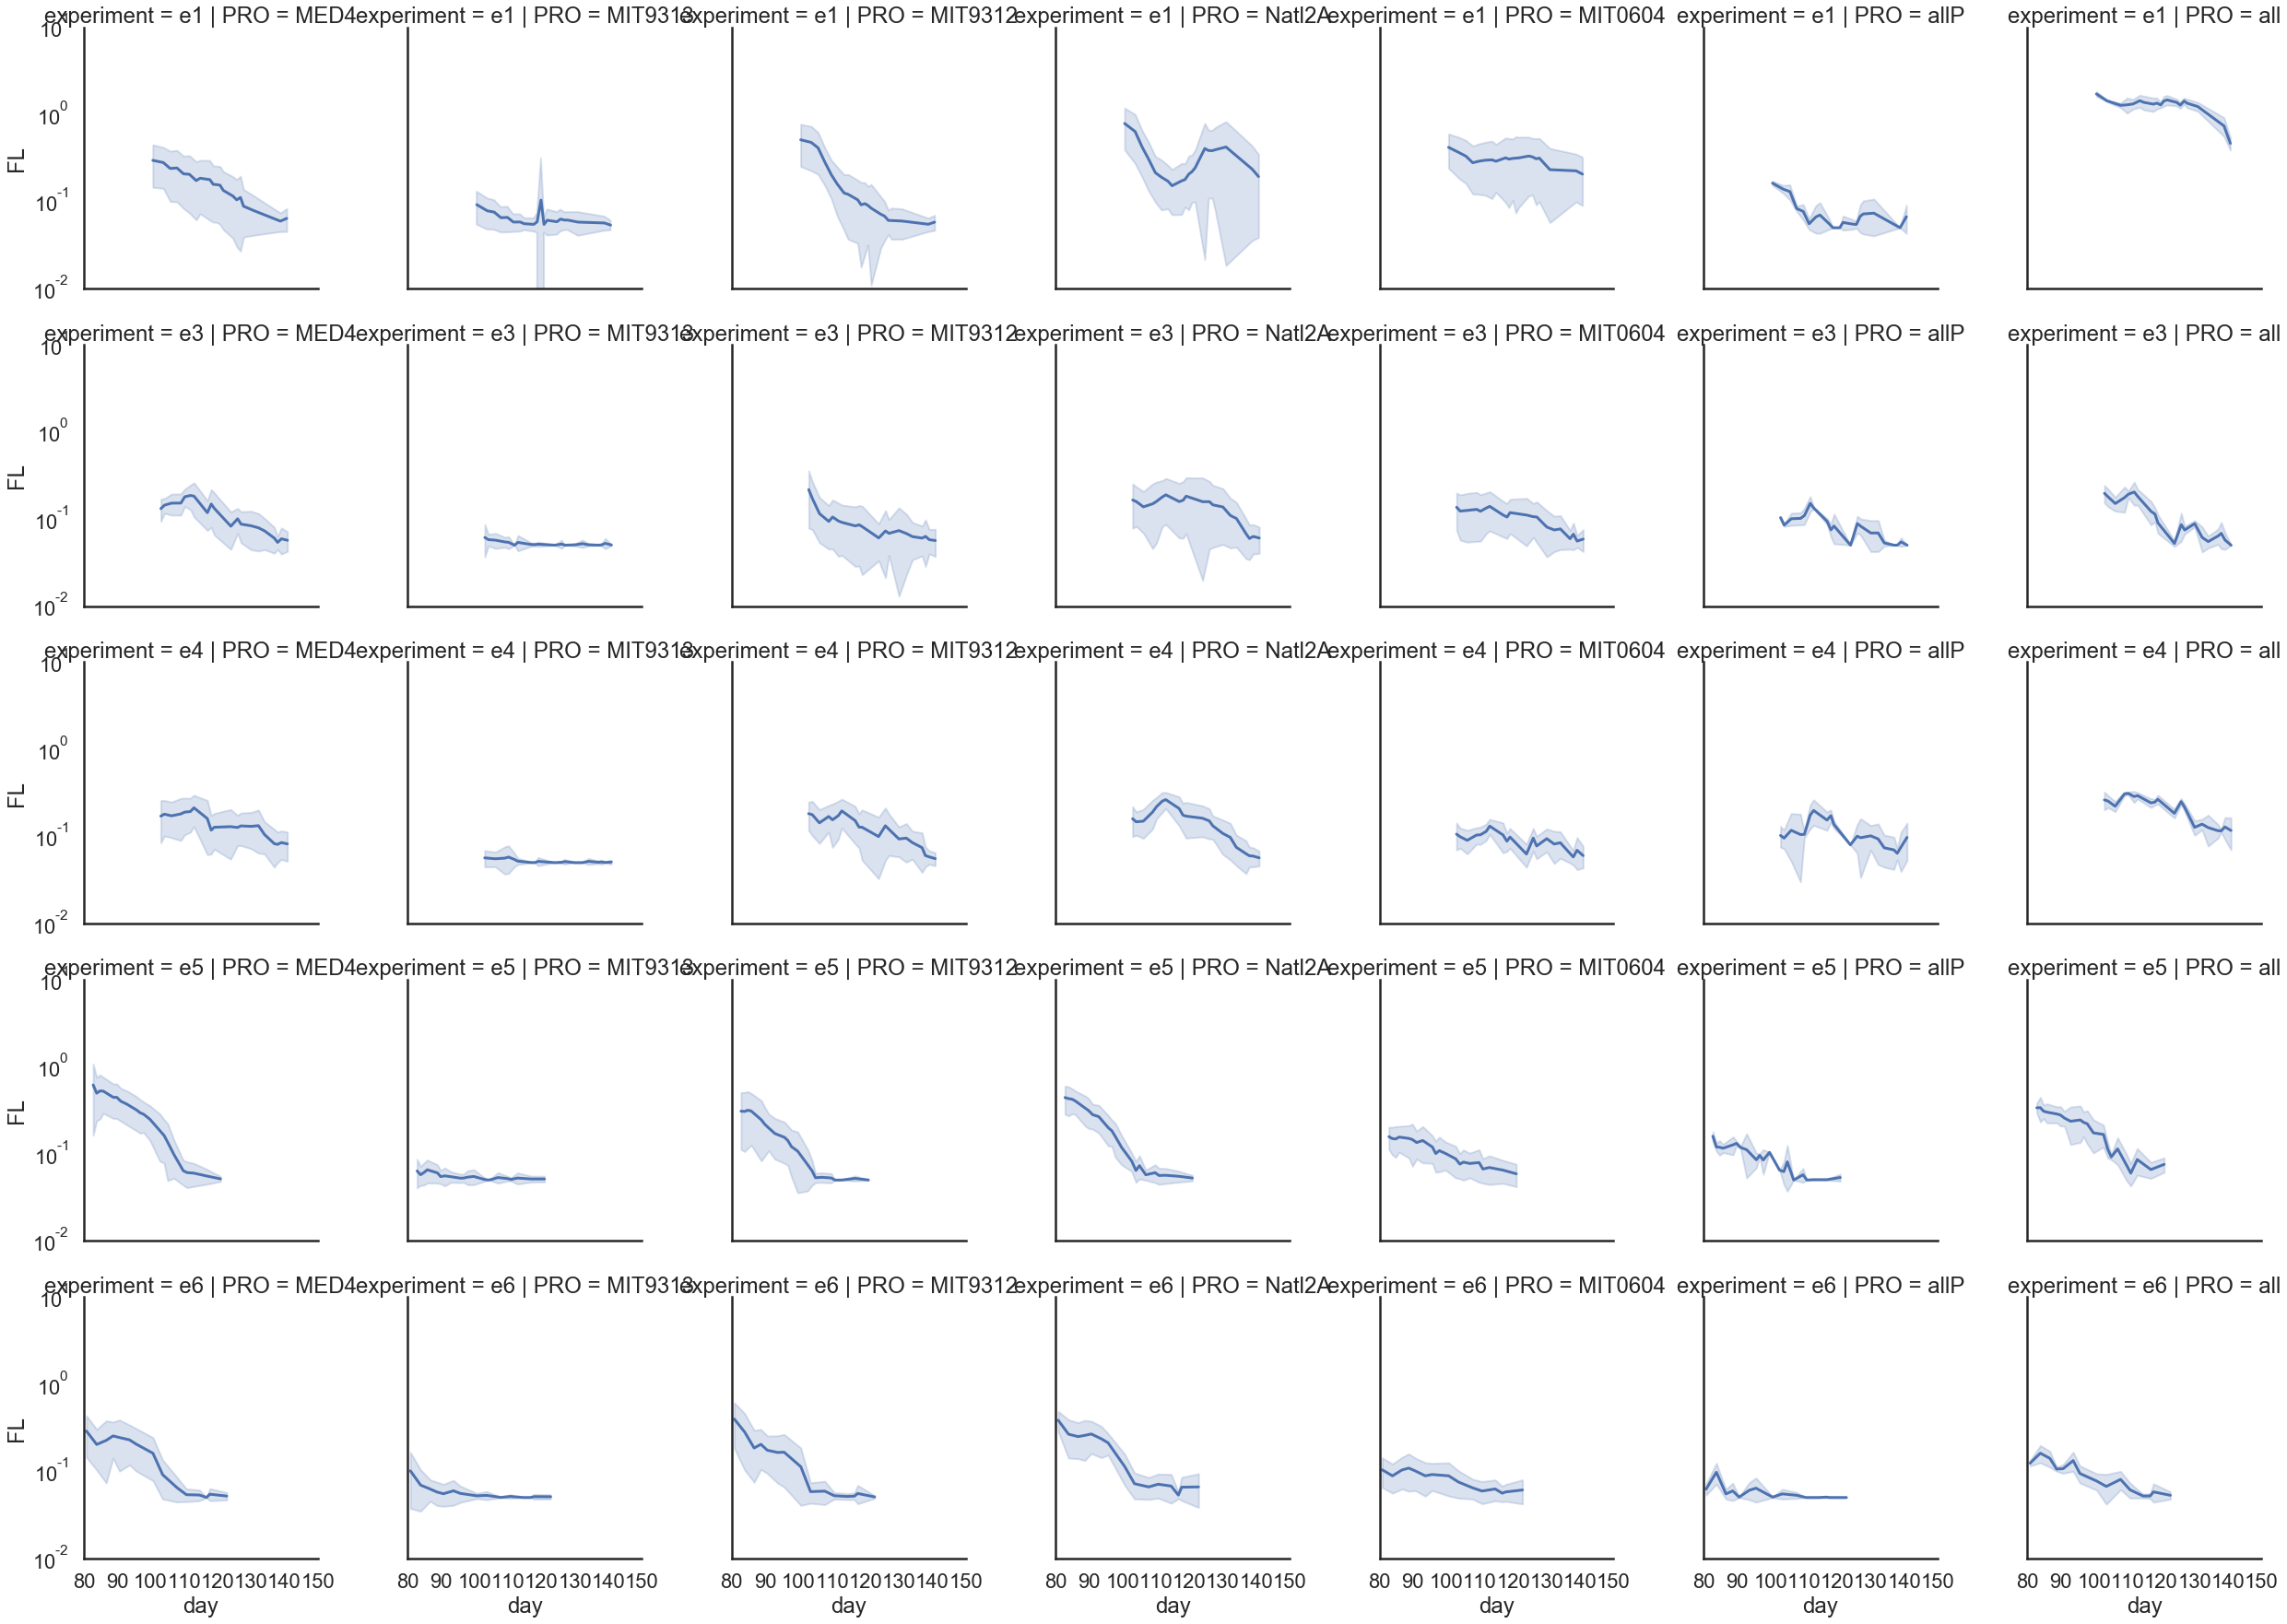

In [30]:
sns.relplot(data=dfw, 
            x='day', y='FL', 
            kind='line', ci='sd', col='PRO', row='experiment'
           )
plt.yscale('log')

In [29]:
dfw.day.value_counts()

83.850000     139
109.822917     91
103.788194     91
111.593750     91
113.623611     91
             ... 
89.840000      69
95.810000      69
116.920000     69
96.800000      69
84.820000      69
Name: day, Length: 95, dtype: int64

In [49]:
dfw_resample = cp.resample_df(dfw, dropna=False)

In [50]:
X = dfw_resample.pivot(index='experiment_sample', columns='day', values='FL')
Xi = X.interpolate(method='from_derivatives', axis=1, limit_area='inside')

In [51]:
dfw_resample.groupby('experiment_sample').day.count().value_counts()

38    151
41     91
43     70
39     69
Name: day, dtype: int64

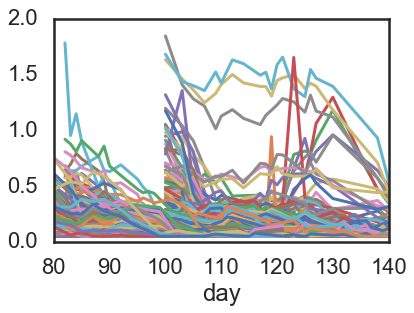

In [52]:
Xi.T.plot(legend=False)

In [53]:
Xi.columns

Int64Index([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
             93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
            106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
            119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
            132, 133, 134, 135, 136, 137, 138, 139, 140],
           dtype='int64', name='day')

In [54]:
Xi.index

Index(['e1, 10A', 'e1, 10B', 'e1, 10C', 'e1, 11A', 'e1, 11B', 'e1, 11C',
       'e1, 12A', 'e1, 12B', 'e1, 12C', 'e1, 13A',
       ...
       'e6, 6B', 'e6, 6C', 'e6, 7A', 'e6, 7C', 'e6, 8A', 'e6, 8B', 'e6, 8C',
       'e6, 9A', 'e6, 9B', 'e6, 9C'],
      dtype='object', name='experiment_sample', length=381)

In [55]:
Xi.columns.min(), Xi.columns.max()


(80, 140)

In [56]:
window = 10
win_list = list()
for i in range(Xi.columns.min(), Xi.columns.max()+1-window):
    df_win = Xi.loc[:,[i:1+win]]
    df_win.index= df_win.index.to_series() + f',{i}'
    win_list.append(df_win)
    

SyntaxError: invalid syntax (<ipython-input-56-4afa6d586f36>, line 4)